In [11]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
import numpy as np


### Example data load

In [7]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Week9/ThoraricSurgery.csv'
#Data = np.loadtxt('ThoraricSurgery.csv', delimiter=',')
Data = np.loadtxt(url, delimiter=',')

### Splitting data into input and output

In [8]:
X = Data[:, :17]
Y = Data[:, 17]
X.shape, Y.shape

((470, 17), (470,))

### Subclass API

In [108]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs,name=None):
        super(MyDenseLayer, self).__init__(name=name)
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.weight = self.add_weight("weight", shape=[int(input_shape[-1]),self.num_outputs])
        self.bias = self.add_weight("bias", shape=[1,self.num_outputs])

    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.weight) + self.bias)

In [109]:
## Input layer with 17 features
InpLayer = Input(shape=(X.shape[-1]), name='Inp')
InpLayer

<KerasTensor: shape=(None, 17) dtype=float32 (created by layer 'Inp')>

In [110]:
## Hidden layer 1 with a 2D wiegh matrix (17 , 10) and a 2D bias matrix (1, 10)
HL1 = MyDenseLayer(10, name='CustomHL1')(InpLayer)
HL1

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'CustomHL1')>

In [111]:
## Concatenating InpLayer and HD2 to generate HD3
HL2 = Concatenate(axis=1, name='HL2')([InpLayer, HL1])
HL2

<KerasTensor: shape=(None, 27) dtype=float32 (created by layer 'HL2')>

In [112]:
## Hidden layer 3 with a 2D wiegh matrix (27 , 5) and a 2D bias matrix (1, 5)
HL3 = Dense(5, activation='relu', name='HL3')(HL2)
HL3

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'HL3')>

In [113]:
## Output layer a 2D wiegh matrix (5 , 1) and a 2D bias matrix (1, 1)
Out = Dense(1, activation='sigmoid', name='Out')(HL3)

In [114]:
### Defining the model by specifying inputs and outputs
model = Model(InpLayer, Out)

In [115]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inp (InputLayer)                [(None, 17)]         0                                            
__________________________________________________________________________________________________
CustomHL1 (MyDenseLayer)        (None, 10)           180         Inp[0][0]                        
__________________________________________________________________________________________________
HL2 (Concatenate)               (None, 27)           0           Inp[0][0]                        
                                                                 CustomHL1[0][0]                  
__________________________________________________________________________________________________
HL3 (Dense)                     (None, 5)            140         HL2[0][0]                  

 ### Compliling the model
 #### You need to sepcify the loss function and the optimizer

In [116]:
model.compile(loss='BCE', optimizer='adam')

In [117]:
model.fit(X,Y, validation_split=0.2, epochs=50, batch_size=200)
Logs = model.history.history

Epoch 1/50
2/2 [==============================] - 0s 148ms/step - loss: 15.5263 - val_loss: 19.4288
Epoch 2/50
2/2 [==============================] - 0s 54ms/step - loss: 15.0514 - val_loss: 18.8737
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 14.5976 - val_loss: 18.3264
Epoch 4/50
2/2 [==============================] - 0s 56ms/step - loss: 13.8916 - val_loss: 17.7872
Epoch 5/50
2/2 [==============================] - 0s 52ms/step - loss: 13.3830 - val_loss: 17.2508
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 13.1991 - val_loss: 16.7082
Epoch 7/50
2/2 [==============================] - 0s 79ms/step - loss: 12.8974 - val_loss: 16.1607
Epoch 8/50
2/2 [==============================] - 0s 77ms/step - loss: 12.1900 - val_loss: 15.6442
Epoch 9/50
2/2 [==============================] - 0s 56ms/step - loss: 11.8442 - val_loss: 15.1361
Epoch 10/50
2/2 [==============================] - 0s 55ms/step - loss: 11.5975 - val_loss: 14.6329
Epoch 11

### Visualization of losses

In [118]:
import matplotlib.pyplot as plt


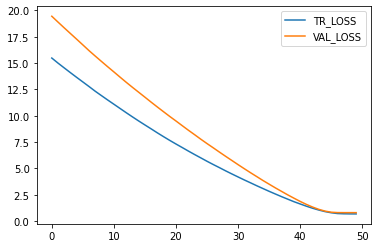

In [119]:
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()